<a href="https://colab.research.google.com/github/pallabi-300/Flower-Classification-with-Tensor-Flow/blob/main/Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/siamarefin/ETM.git

Cloning into 'ETM'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 168 (delta 60), reused 97 (delta 49), pack-reused 0
Receiving objects: 100% (168/168), 4.14 MiB | 17.68 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [2]:
%cd /content/ETM/embedded-topic-model


/content/ETM/embedded-topic-model


In [4]:
import numpy as np
import torch
from scipy.io import loadmat
from embedded_topic_model.utils.data import get_batch
from embedded_topic_model.models.etm import ETM

# Load vocabulary
vocabulary = np.load('/content/ETM/embedded-topic-model/embedded_topic_model/data/20ng/vocab.pkl', allow_pickle=True)

# Load training data
bow_tr_tokens = loadmat('/content/ETM/embedded-topic-model/embedded_topic_model/data/20ng/bow_tr_tokens.mat')['tokens']
bow_tr_counts = loadmat('/content/ETM/embedded-topic-model/embedded_topic_model/data/20ng/bow_tr_counts.mat')['counts']

# Convert tokens and counts to the correct format
# train_tokenss = [bow_tr_tokens[i][0] for i in range(bow_tr_tokens.shape[0])]
# train_counts = [bow_tr_counts[i][0] for i in range(bow_tr_counts.shape[0])]
# print(train_tokenss)

# train_tokens = bow_tr_tokens.copy()
# train_tokens = train_tokens.reshape(-1);
# for j in range(train_tokens.shape[0]):
#   train_tokens[j] = train_tokens[j].reshape(-1);


train_tkns = bow_tr_tokens.copy()
train_tkns = train_tkns.reshape(-1)
train_tokens = []
for j in range(train_tkns.shape[0]):
    # Reshape each token array and wrap it in another array
    token_array = train_tkns[j].reshape(-1)
    train_tokens.append(np.array([token_array]))


train_ctns = bow_tr_counts.copy()
train_ctns = train_ctns.reshape(-1)
train_counts = []
for j in range(train_ctns.shape[0]):
    # Reshape each token array and wrap it in another array
    token_array = train_ctns[j].reshape(-1)
    train_counts.append(np.array([token_array]))
# print(train_counts)

# Load validation data
bow_va_tokens = loadmat('/content/ETM/embedded-topic-model/embedded_topic_model/data/20ng/bow_va_tokens.mat')['tokens']
bow_va_counts = loadmat('/content/ETM/embedded-topic-model/embedded_topic_model/data/20ng/bow_va_counts.mat')['counts']

# Convert validation tokens and counts to the correct format
# valid_tokens = [bow_va_tokens[i][0] for i in range(bow_va_tokens.shape[0])]
# valid_counts = [bow_va_counts[i][0] for i in range(bow_va_counts.shape[0])]


valid_tkns = bow_va_tokens.copy()
valid_tkns = valid_tkns.reshape(-1)
valid_tokens = []
for j in range(valid_tkns.shape[0]):
    # Reshape each token array and wrap it in another array
    token_array = valid_tkns[j].reshape(-1)
    valid_tokens.append(np.array([token_array]))


valid_ctns = bow_va_counts.copy()
valid_ctns = valid_ctns.reshape(-1)
valid_counts = []
for j in range(valid_ctns.shape[0]):
    # Reshape each token array and wrap it in another array
    token_array = valid_ctns[j].reshape(-1)
    valid_counts.append(np.array([token_array]))


# Load test data
bow_ts_tokens = loadmat('/content/ETM/embedded-topic-model/embedded_topic_model/data/20ng/bow_ts_tokens.mat')['tokens']
bow_ts_counts = loadmat('/content/ETM/embedded-topic-model/embedded_topic_model/data/20ng/bow_ts_counts.mat')['counts']

# Convert test tokens and counts to the correct format
# test_tokens = [bow_ts_tokens[i][0] for i in range(bow_ts_tokens.shape[0])]
# test_counts = [bow_ts_counts[i][0] for i in range(bow_ts_counts.shape[0])]


test_tkns = bow_ts_tokens.copy()
test_tkns = test_tkns.reshape(-1)
test_tokens = []
for j in range(test_tkns.shape[0]):
    # Reshape each token array and wrap it in another array
    token_array = test_tkns[j].reshape(-1)
    test_tokens.append(np.array([token_array]))


test_ctns = bow_ts_counts.copy()
test_ctns = test_ctns.reshape(-1)
test_counts = []
for j in range(test_ctns.shape[0]):
    # Reshape each token array and wrap it in another array
    token_array = test_ctns[j].reshape(-1)
    test_counts.append(np.array([token_array]))

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:

# Prepare training data
train_data = {'tokens': train_tokens, 'counts': train_counts}

# Prepare validation data
valid_data = {'tokens': valid_tokens, 'counts': valid_counts}
# Prepare test data
test_data = {'tokens': test_tokens, 'counts': test_counts}

# Prepare test data
test_data = {
    'test': {
        'tokens': loadmat('/content/ETM/embedded-topic-model/embedded_topic_model/data/20ng/bow_ts_tokens.mat')['tokens'],
        'counts': loadmat('/content/ETM/embedded-topic-model/embedded_topic_model/data/20ng/bow_ts_counts.mat')['counts']
    },
    'test1': {
        'tokens': loadmat('/content/ETM/embedded-topic-model/embedded_topic_model/data/20ng/bow_ts_h1_tokens.mat')['tokens'],
        'counts': loadmat('/content/ETM/embedded-topic-model/embedded_topic_model/data/20ng/bow_ts_h1_counts.mat')['counts']
    },
    'test2': {
        'tokens': loadmat('/content/ETM/embedded-topic-model/embedded_topic_model/data/20ng/bow_ts_h2_tokens.mat')['tokens'],
        'counts': loadmat('/content/ETM/embedded-topic-model/embedded_topic_model/data/20ng/bow_ts_h2_counts.mat')['counts']
    }
}


In [6]:
k = 50

In [7]:
etm_instance = ETM(
    vocabulary,
    embeddings="/content/ETM/embedded-topic-model/tests/resources/train_w2v_embeddings.wordvectors",
    num_topics=k,
    epochs=1000,
    debug_mode=True,
)

etm_instance.fit(train_data)

Topics before training: [['lay', 'entry', 'displays', 'march', 'coverage', 'treated', 'concerns', 'eventually', 'programs', 'pitch'], ['spiritual', 'thought', 'battle', 'proven', 'engineer', 'made', 'editor', 'father', 'wire', 'mountain'], ['steps', 'sc', 'orbit', 'experts', 'session', 'won', 'poster', 'chief', 'cold', 'hurt'], ['silly', 'doctors', 'allan', 'zoo', 'policies', 'gif', 'impression', 'listen', 'systems', 'justification'], ['requirements', 'houses', 'arc', 'began', 'jason', 'charge', 'respect', 'list', 'tech', 'excellent'], ['hundred', 'record', 'transmission', 'forgot', 'materials', 'designed', 'option', 'ct', 'pixel', 'orders'], ['armenian', 'ridiculous', 'checking', 'stone', 'propaganda', 'zone', 'houston', 'type', 'practices', 'europe'], ['fri', 'projects', 'notion', 'lc', 'enforcement', 'po', 'wed', 'honda', 'refer', 'project'], ['wings', 'matter', 'killed', 'bike', 'english', 'bay', 'corporation', 'aurora', 'homosexuality', 'spiritual'], ['addition', 'duke', 'joe', 'r

In [8]:
topic_coherence = etm_instance.get_topic_coherence(20)
print("Topic Coherence:", topic_coherence)

Topic Coherence: 0.16726003730582034


In [9]:
topic_diversity= etm_instance.get_topic_diversity(20)
print("topic_diversity", topic_diversity)

topic_diversity 0.525


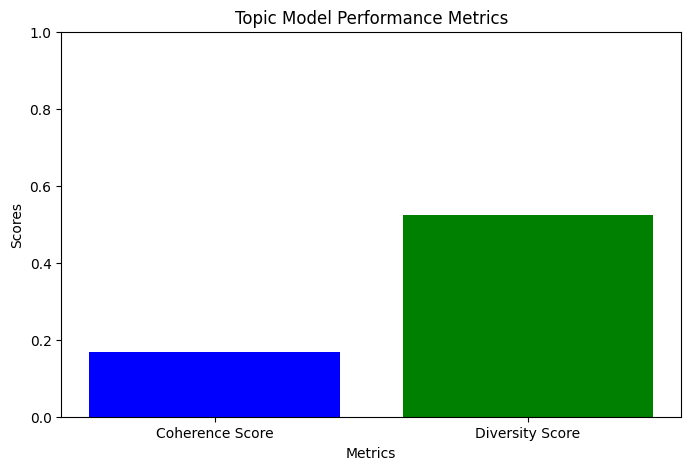

In [10]:
import matplotlib.pyplot as plt

# Example values (replace with your actual values)
coherence_score = 0.17
diversity_score = 0.45

# Data for plotting
scores = [topic_coherence, topic_diversity]
labels = ['Coherence Score', 'Diversity Score']

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Topic Model Performance Metrics')
plt.ylim(0, 1)  # Assuming scores are between 0 and 1
plt.show()

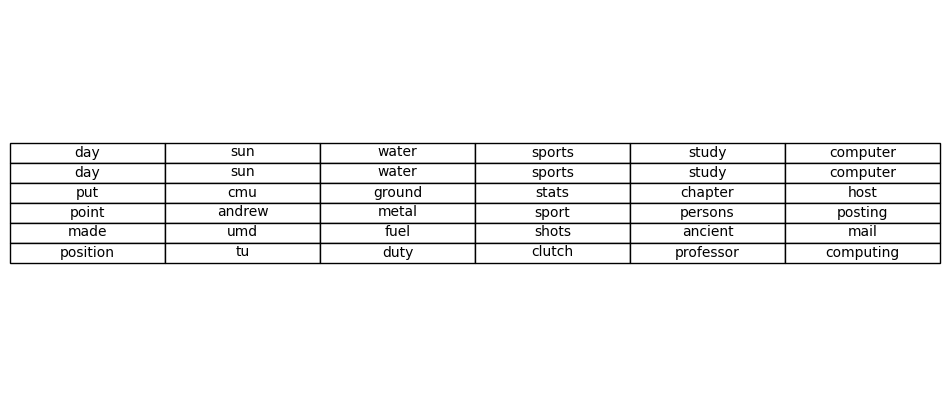

In [11]:
import pandas as pd
most_similer = etm_instance.get_most_similar_words(["day", "sun", "water", "sports", "study", "computer" ], 5)
# Create a DataFrame from the dictionary
df = pd.DataFrame(most_similer)
fig, ax = plt.subplots(figsize=(10, 5))  # Set the size of the plot
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()

In [14]:
t_w_mtx = etm_instance.get_topic_word_matrix()
print(t_w_mtx)

[['ii', 'plate', 'duke', 'greatly', 'holds', 'tx', 'located', 'linux', 'stuck', 'tel', 'bother', 'keyboard', 'std', 'library', 'companies', 'past', 'quote', 'side', 'society', 'believes', 'person', 'method', 'anonymous', 'ap', 'pub', 'shut', 'hoping', 'color', 'response', 'cco', 'taught', 'split', 'muslims', 'insert', 'correct', 'developed', 'poster', 'network', 'agent', 'playoffs', 'happy', 'experiences', 'informed', 'appears', 'shown', 'shape', 'learning', 'channel', 'senior', 'richard', 'tomorrow', 'interests', 'laser', 'formats', 'gm', 'au', 'drink', 'plays', 'acc', 'collection', 'cops', 'numerous', 'feeling', 'angels', 'handy', 'golden', 'message', 'isa', 'continues', 'scheduled', 'held', 'microsystems', 'satellite', 'function', 'biblical', 'liberal', 'attacks', 'hmm', 'app', 'mouse', 'amateur', 'powerful', 'expires', 'teams', 'regularly', 'revealed', 'donald', 'sequence', 'serdar', 'similarly', 'uunet', 'bet', 'ultra', 'thousands', 'accident', 'shop', 'minimum', 'primary', 'gener

Shape of cleaned_t_w_mtx: (3072, 944)
Data type of cleaned_t_w_mtx elements: float64


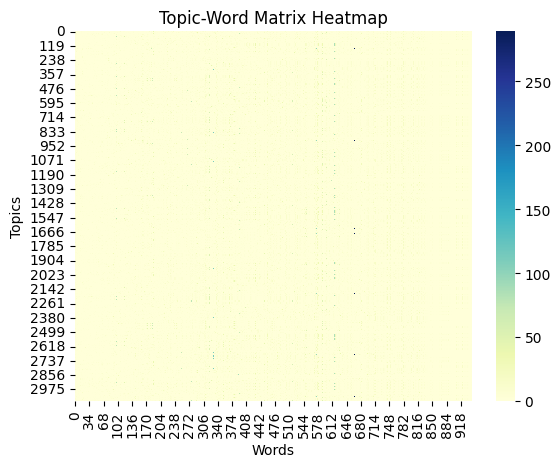

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten the nested arrays and construct the topic-word matrix
def flatten_and_clean(matrix):
    cleaned_data = []
    max_topic_idx = 0
    max_word_idx = 0

    for row in matrix:
        # Extract the nested arrays
        topic_indices = row[0].flatten()
        word_counts = row[1].flatten()

        # Update the maximum indices
        if len(topic_indices) > 0:
            max_topic_idx = max(max_topic_idx, max(topic_indices))
        max_word_idx = max(max_word_idx, len(word_counts))

        # Combine into a list of lists
        cleaned_data.append((topic_indices, word_counts))

    # Initialize the topic-word matrix with zeros
    topic_word_matrix = np.zeros((max_topic_idx + 1, max_word_idx))

    # Fill in the topic-word matrix
    for i, (topics, counts) in enumerate(cleaned_data):
        topic_word_matrix[topics, :len(counts)] = counts

    return topic_word_matrix

# Assuming t_w_mtx is your topic-word matrix
cleaned_t_w_mtx = flatten_and_clean(t_w_mtx)

# Verify the cleaned matrix
print(f"Shape of cleaned_t_w_mtx: {cleaned_t_w_mtx.shape}")
print(f"Data type of cleaned_t_w_mtx elements: {cleaned_t_w_mtx.dtype}")

# Plotting the heatmap
sns.heatmap(cleaned_t_w_mtx, cmap="YlGnBu", annot=False)
plt.xlabel('Words')
plt.ylabel('Topics')
plt.title('Topic-Word Matrix Heatmap')
plt.show()


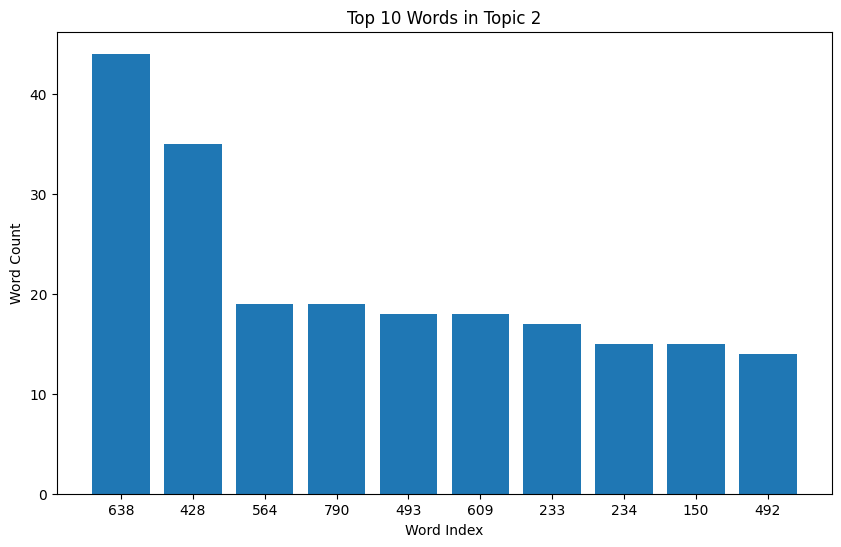

In [25]:
import matplotlib.pyplot as plt

def plot_topic_word_distribution(topic_word_matrix, topic_index, num_words=10):
    topic = topic_word_matrix[topic_index]
    top_indices = topic.argsort()[-num_words:][::-1]
    top_values = topic[top_indices]

    plt.figure(figsize=(10, 6))
    plt.bar(range(num_words), top_values, tick_label=top_indices)
    plt.xlabel('Word Index')
    plt.ylabel('Word Count')
    plt.title(f'Top {num_words} Words in Topic {topic_index}')
    plt.show()

# Plot for topic index 0
plot_topic_word_distribution(cleaned_t_w_mtx, topic_index=2)


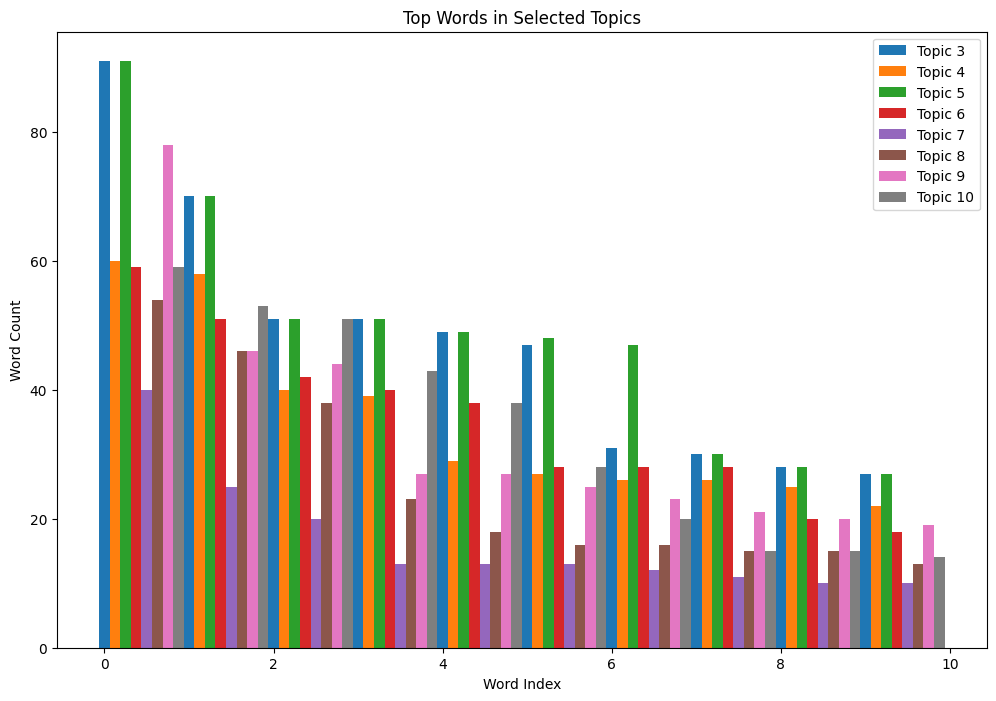

In [28]:
import numpy as np

def plot_clustered_bar_chart(topic_word_matrix, topic_indices, num_words=10):
    num_topics = len(topic_indices)
    indices = np.arange(num_words)

    fig, ax = plt.subplots(figsize=(12, 8))

    for i, topic_index in enumerate(topic_indices):
        topic = topic_word_matrix[topic_index]
        top_indices = topic.argsort()[-num_words:][::-1]
        top_values = topic[top_indices]

        ax.bar(indices + i/num_topics, top_values, width=1/num_topics, label=f'Topic {topic_index}')

    ax.set_xlabel('Word Index')
    ax.set_ylabel('Word Count')
    ax.set_title('Top Words in Selected Topics')
    ax.legend()
    plt.show()

# Plot for topic indices 0 and 1
plot_clustered_bar_chart(cleaned_t_w_mtx, topic_indices=[3, 4,5,6,7,8,9,10])


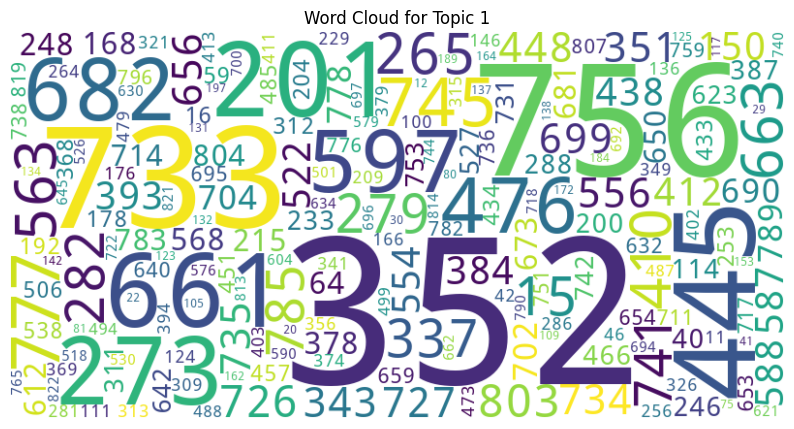

In [23]:
from wordcloud import WordCloud

def plot_word_cloud(topic_word_matrix, topic_index):
    topic = topic_word_matrix[topic_index]
    word_freq = {str(i): topic[i] for i in range(len(topic)) if topic[i] > 0}

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Topic {topic_index}')
    plt.show()

# Plot word cloud for topic index 0
plot_word_cloud(cleaned_t_w_mtx, topic_index=1)


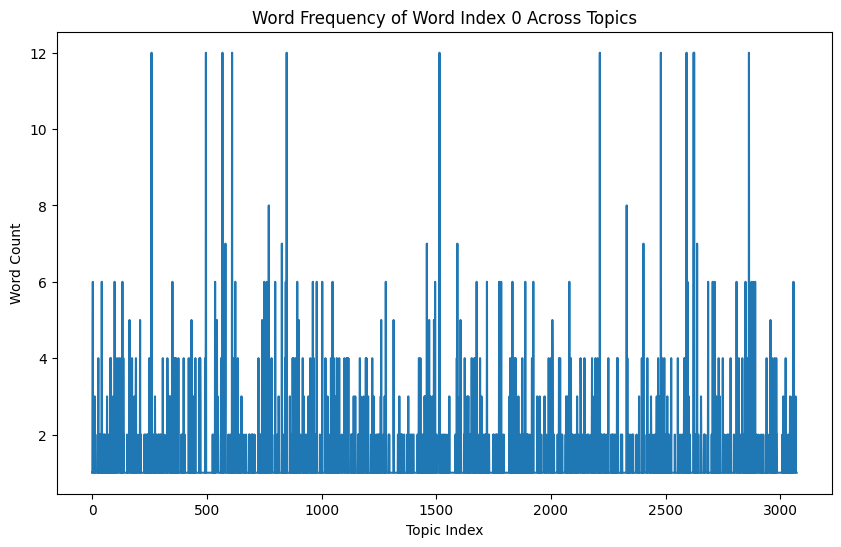

In [24]:
def plot_word_frequency_across_topics(topic_word_matrix, word_index):
    word_counts = topic_word_matrix[:, word_index]

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(word_counts)), word_counts)
    plt.xlabel('Topic Index')
    plt.ylabel('Word Count')
    plt.title(f'Word Frequency of Word Index {word_index} Across Topics')
    plt.show()

# Plot word frequency for word index 0
plot_word_frequency_across_topics(cleaned_t_w_mtx, word_index=0)


In [29]:
t_w_dist_mtx = etm_instance.get_topic_word_dist()
d_t_dist_mtx = etm_instance.get_document_topic_dist()
print(t_w_dist_mtx)
print(d_t_dist_mtx)

tensor([[3.6633e-06, 1.0732e-04, 1.4380e-07,  ..., 7.6409e-04, 3.1130e-03,
         2.1423e-03],
        [2.7585e-06, 1.1503e-04, 6.1259e-07,  ..., 3.6055e-06, 6.3795e-06,
         6.3106e-04],
        [4.5982e-06, 1.6791e-04, 1.0720e-06,  ..., 3.2776e-04, 2.2789e-05,
         4.7127e-04],
        ...,
        [6.8287e-05, 7.6759e-07, 3.3702e-06,  ..., 1.1572e-06, 3.7561e-06,
         4.5872e-06],
        [4.3359e-04, 1.4617e-05, 1.0610e-06,  ..., 1.9589e-06, 3.3192e-06,
         2.3835e-04],
        [2.9489e-06, 2.8353e-07, 4.4312e-07,  ..., 7.2680e-07, 2.5452e-06,
         4.6645e-05]], device='cuda:0')
tensor([[0.0118, 0.0134, 0.2632,  ..., 0.0078, 0.0110, 0.0075],
        [0.0080, 0.0087, 0.0175,  ..., 0.0078, 0.0106, 0.0092],
        [0.0374, 0.0142, 0.0126,  ..., 0.0103, 0.0141, 0.0100],
        ...,
        [0.0059, 0.0062, 0.0048,  ..., 0.0066, 0.0062, 0.0054],
        [0.0058, 0.0055, 0.0057,  ..., 0.0062, 0.0055, 0.0054],
        [0.0060, 0.0063, 0.0063,  ..., 0.0060, 0.0072,

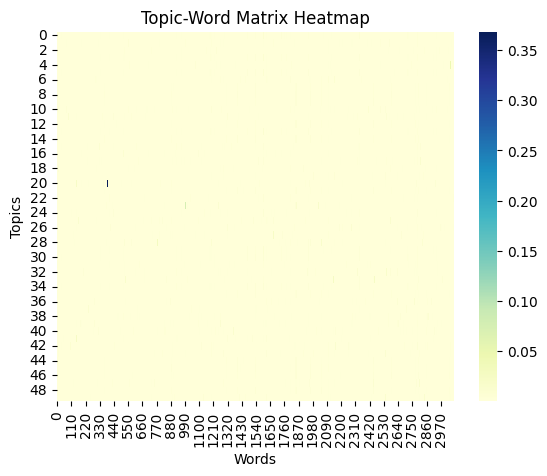

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch

# Assuming t_w_dist_mtx is your topic-word matrix
# Move the tensor to the CPU and convert it to a NumPy array
t_w_dist_mtx_cpu = t_w_dist_mtx.cpu().numpy()

# Plotting the heatmap
sns.heatmap(t_w_dist_mtx_cpu, cmap="YlGnBu")
plt.xlabel('Words')
plt.ylabel('Topics')
plt.title('Topic-Word Matrix Heatmap')
plt.show()


In [32]:
!pip install wordcloud seaborn matplotlib

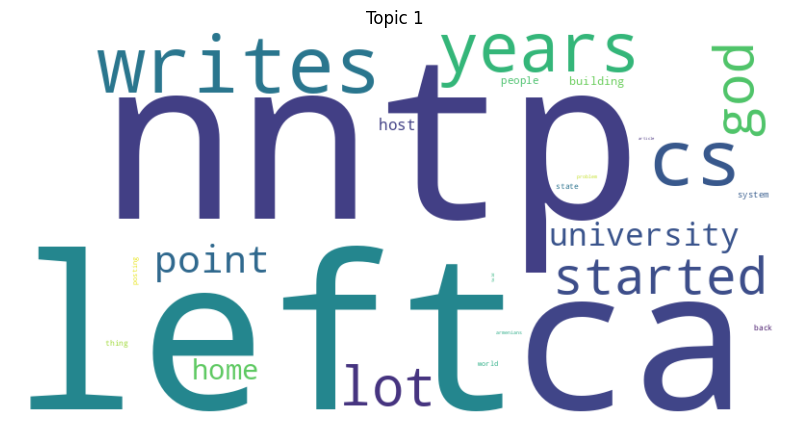

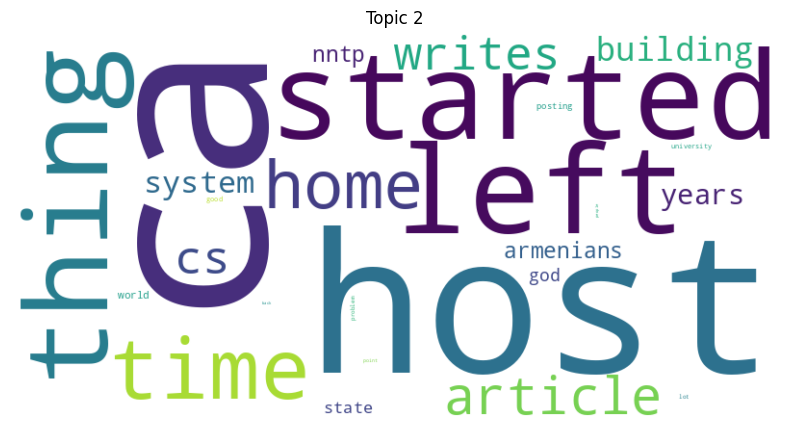

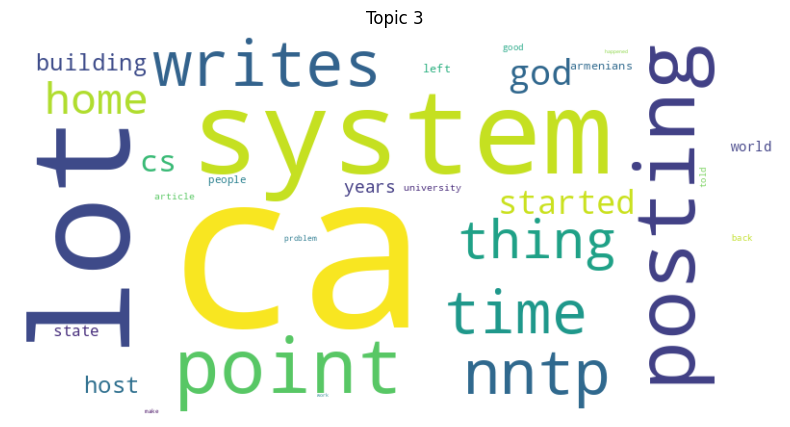

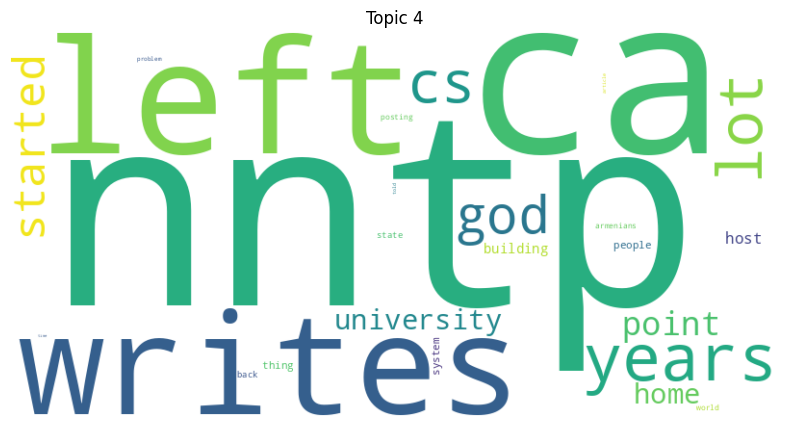

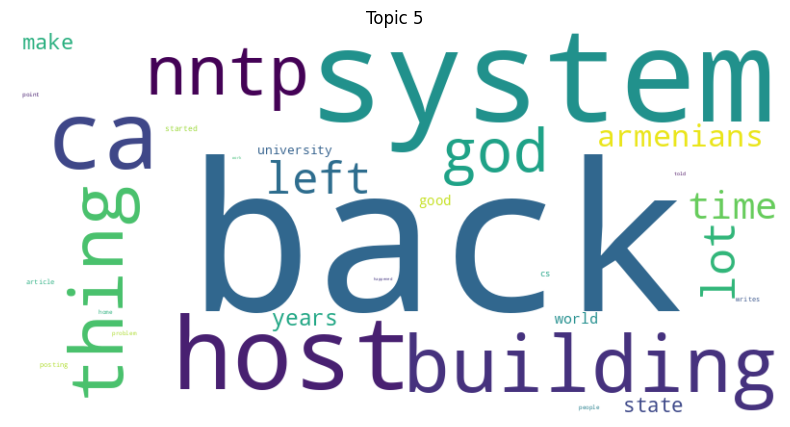

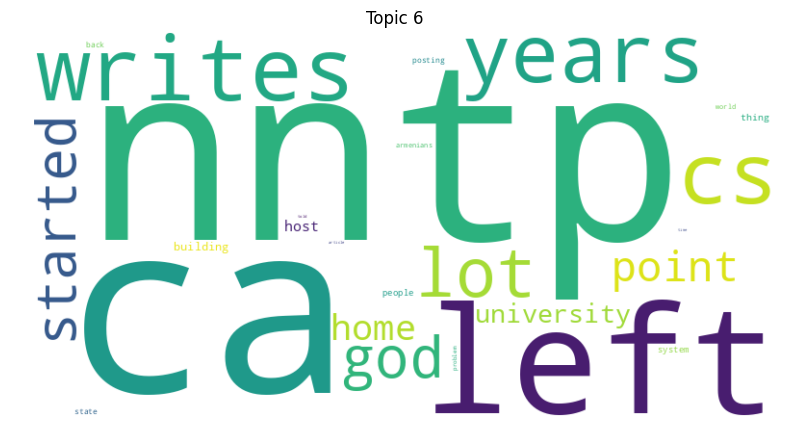

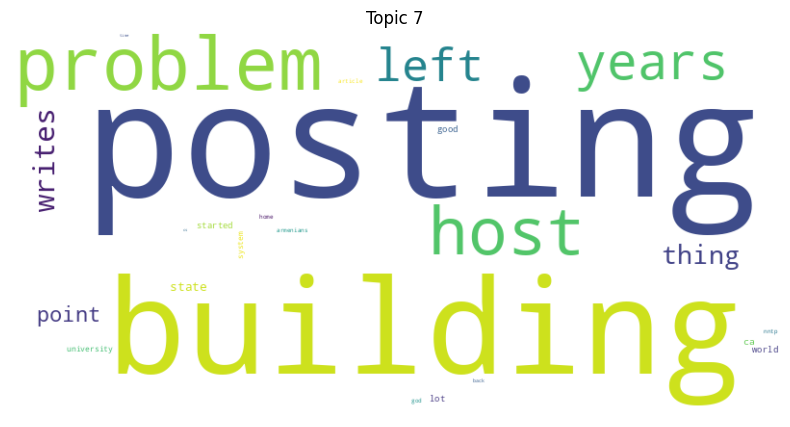

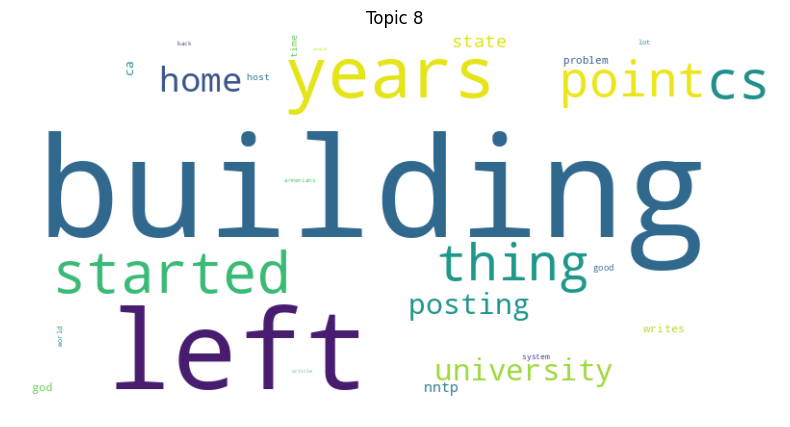

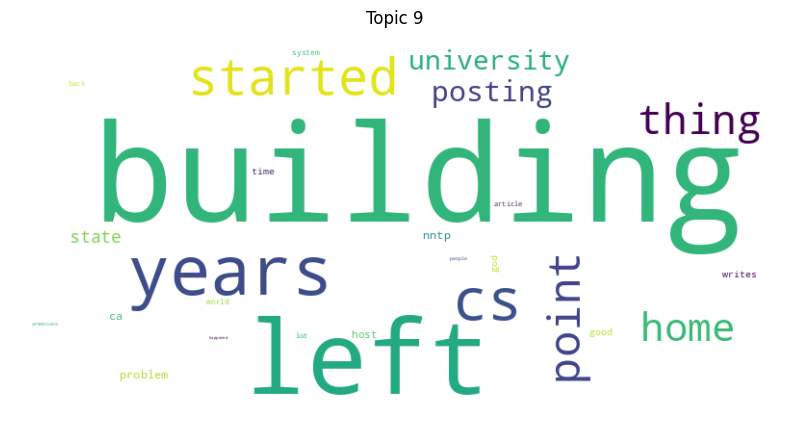

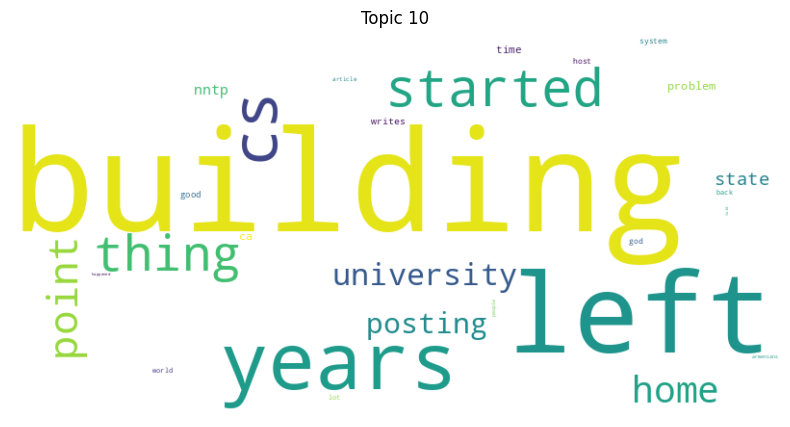

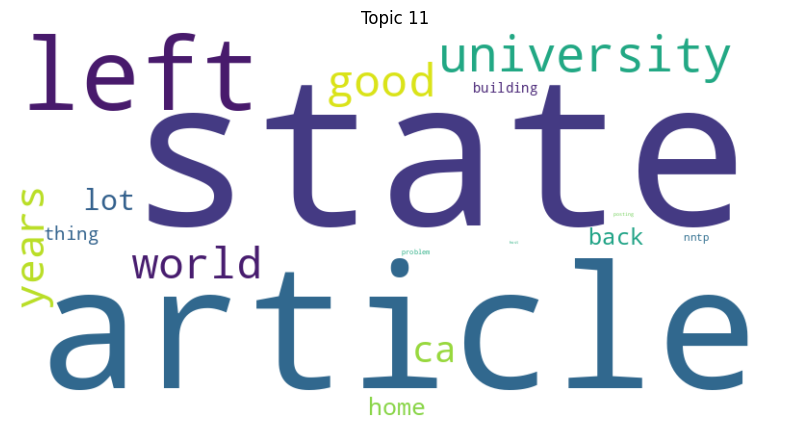

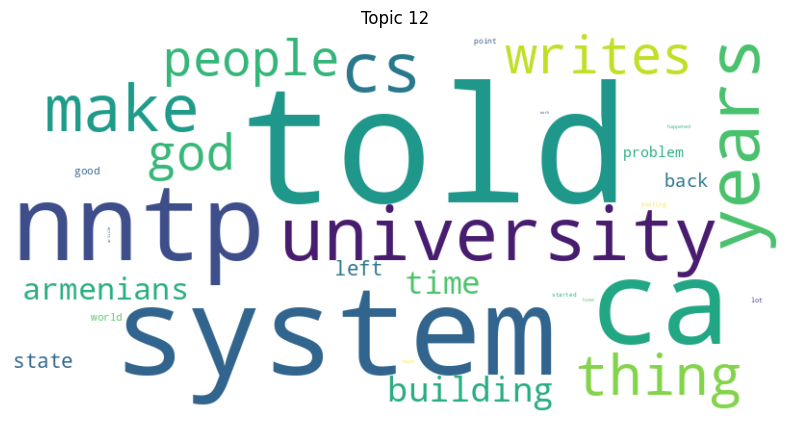

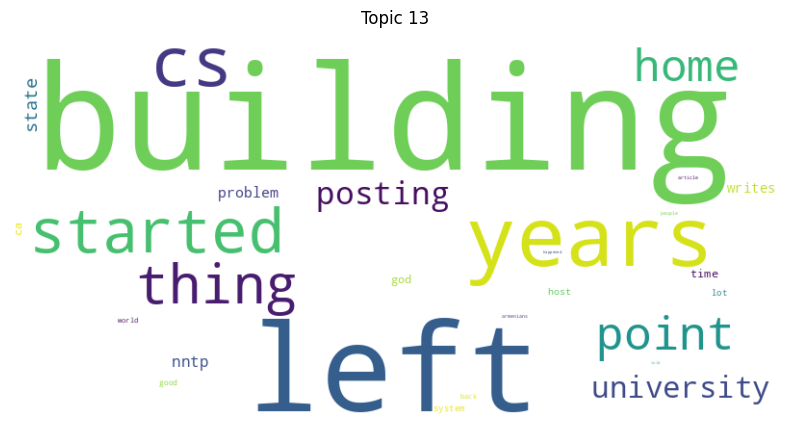

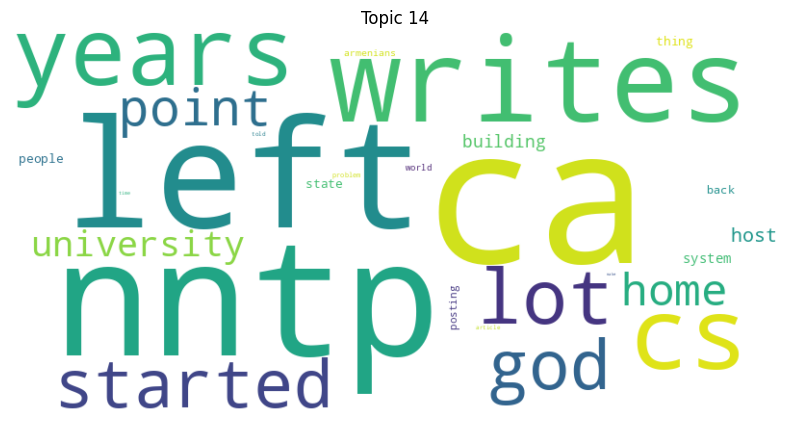

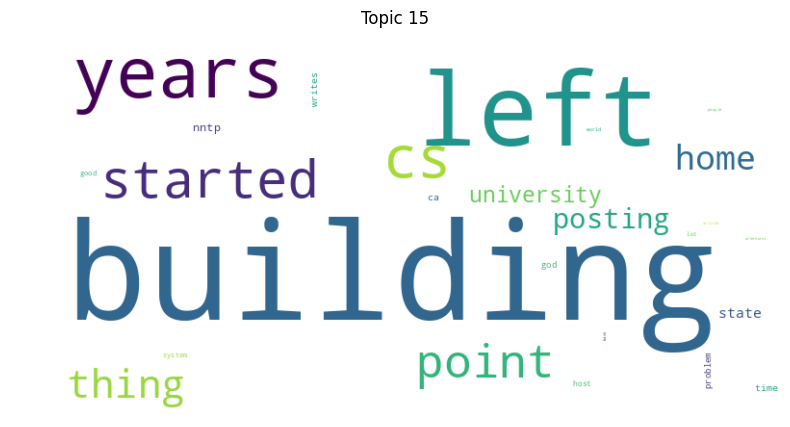

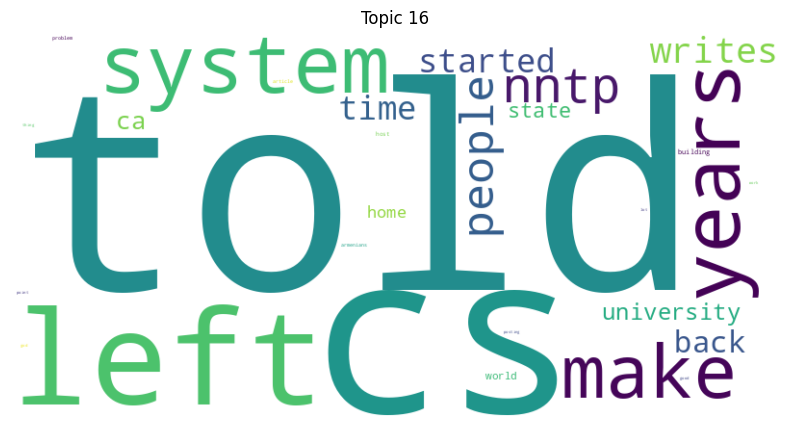

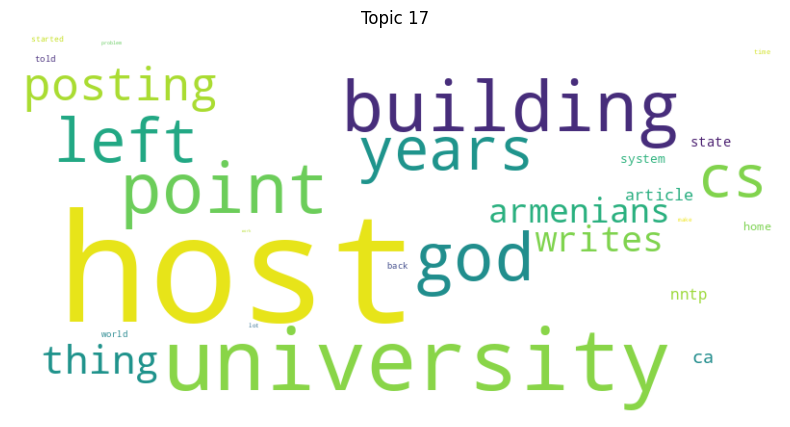

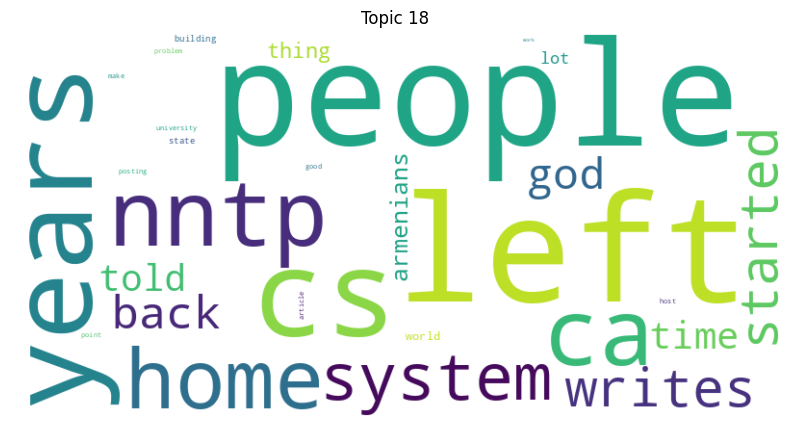

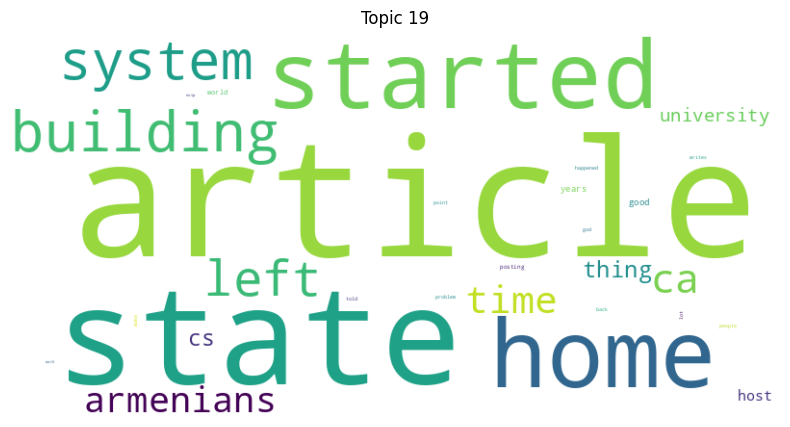

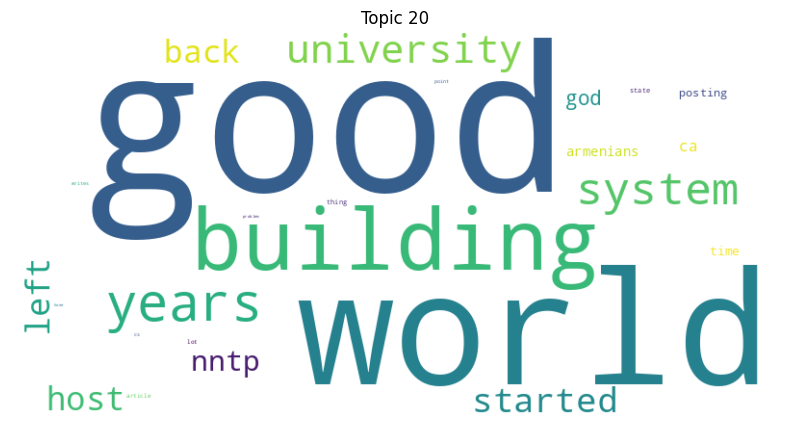

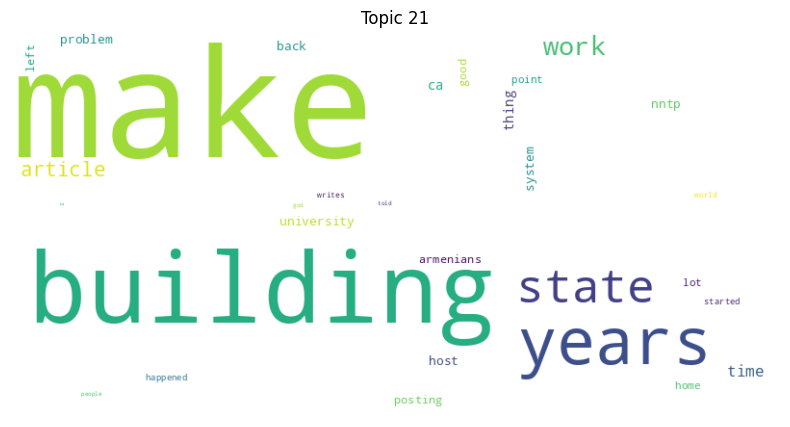

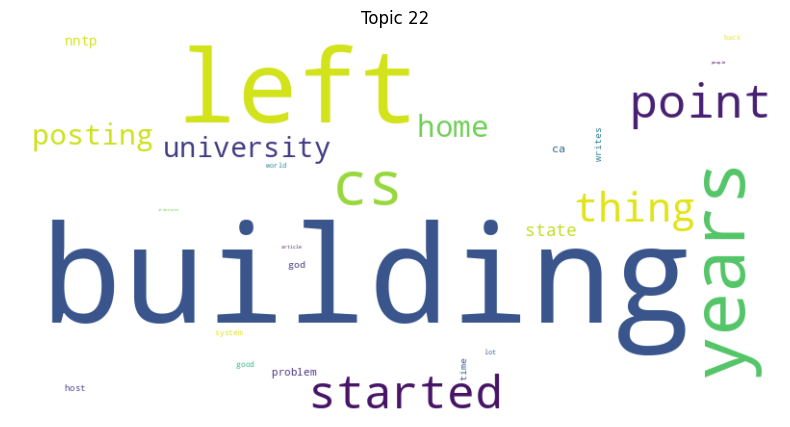

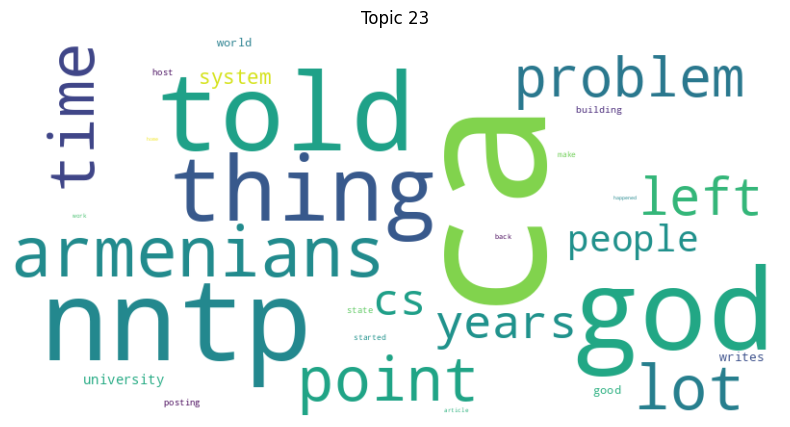

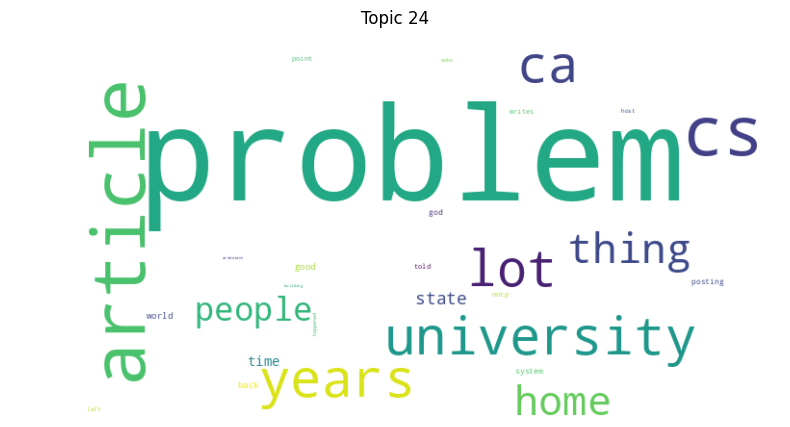

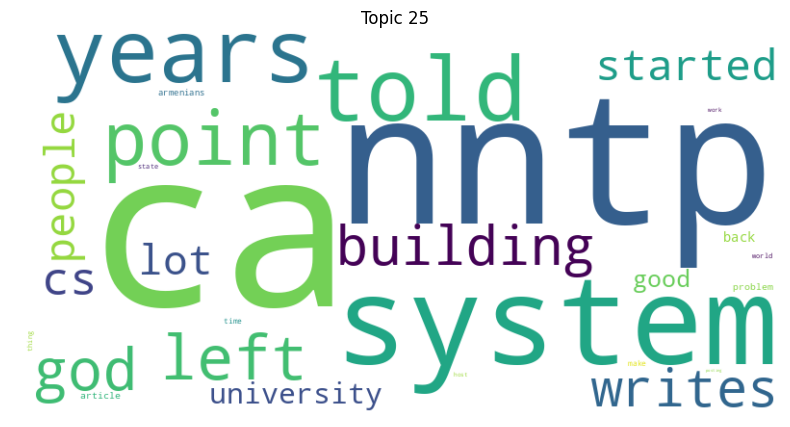

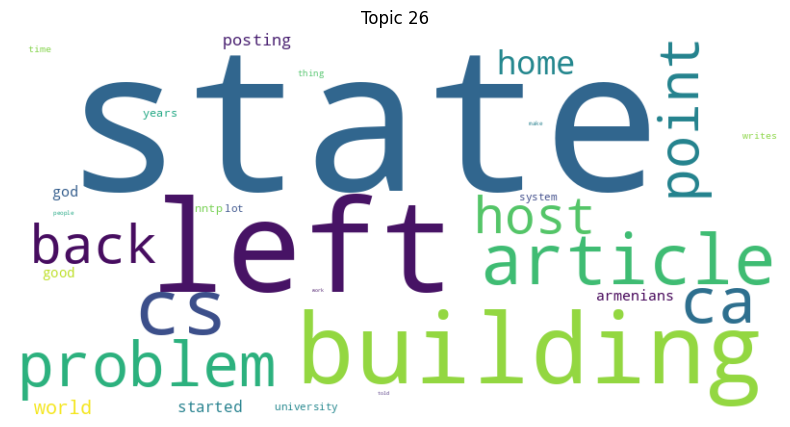

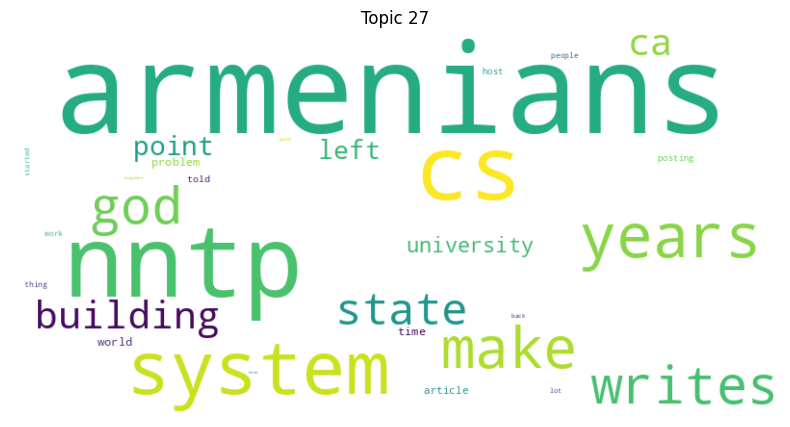

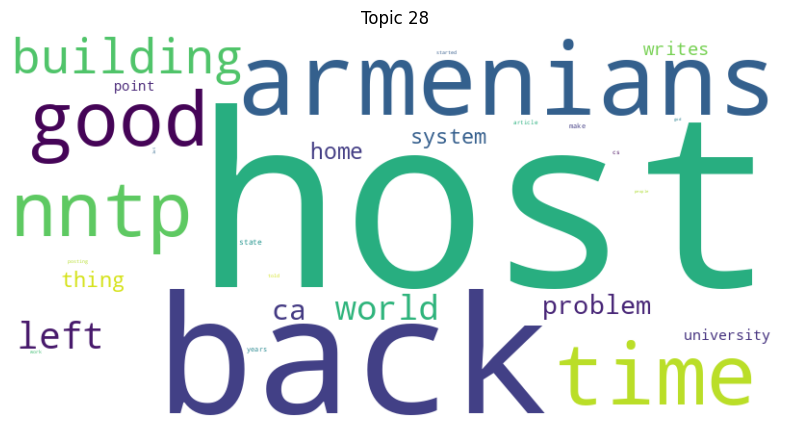

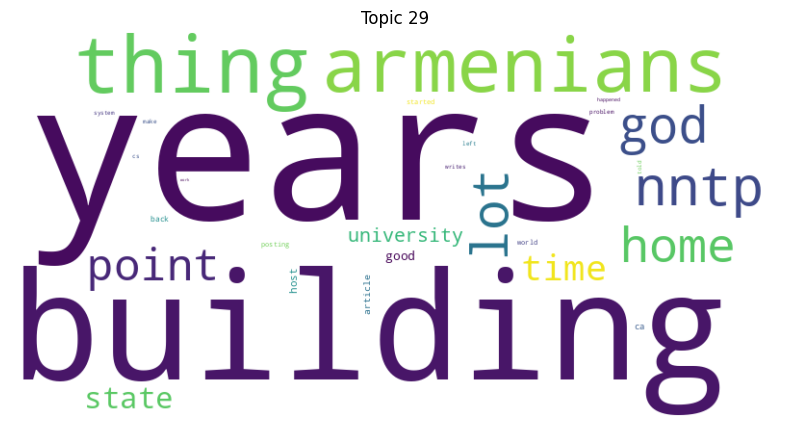

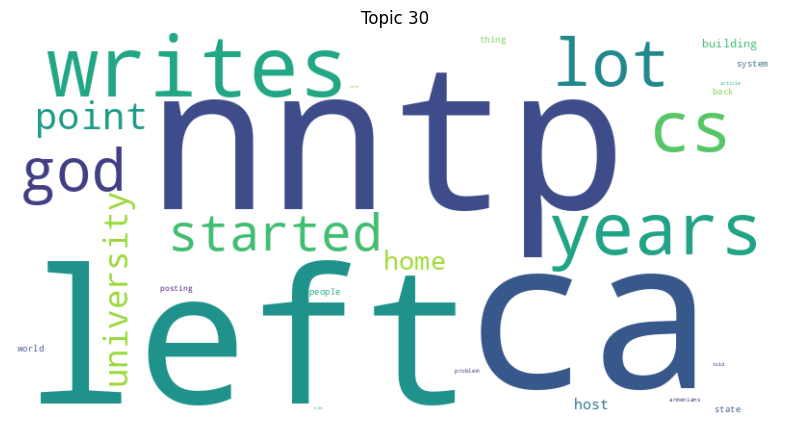

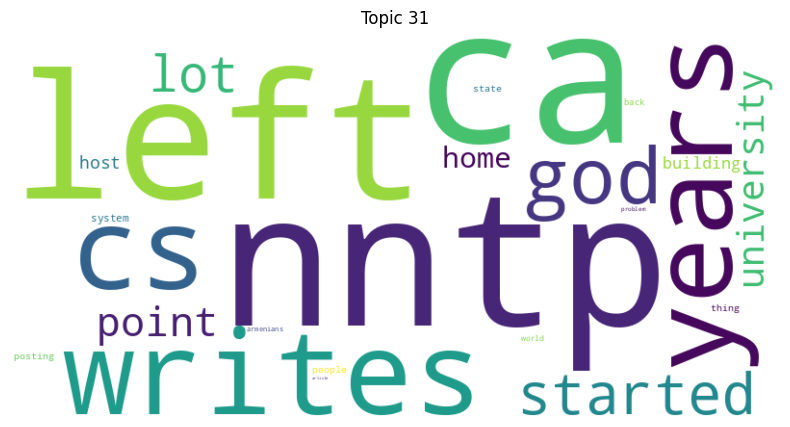

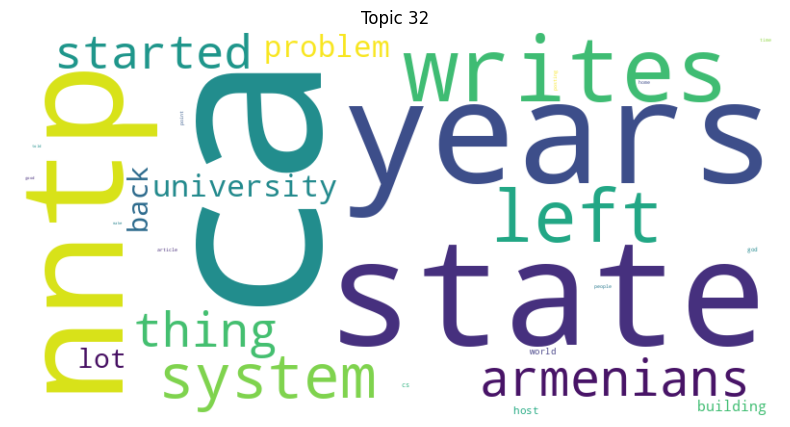

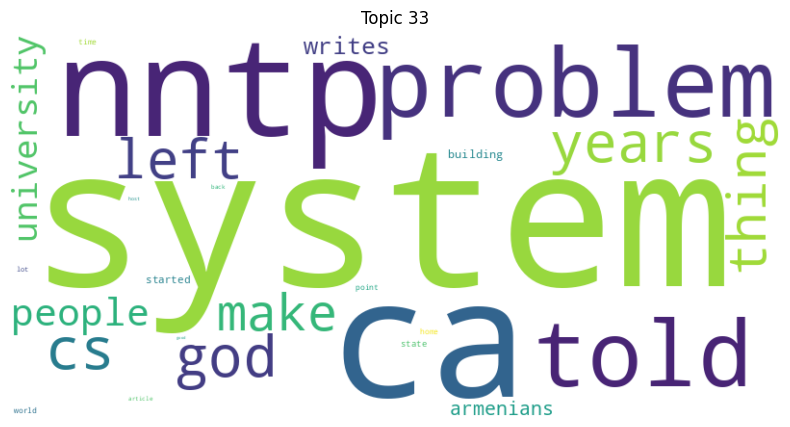

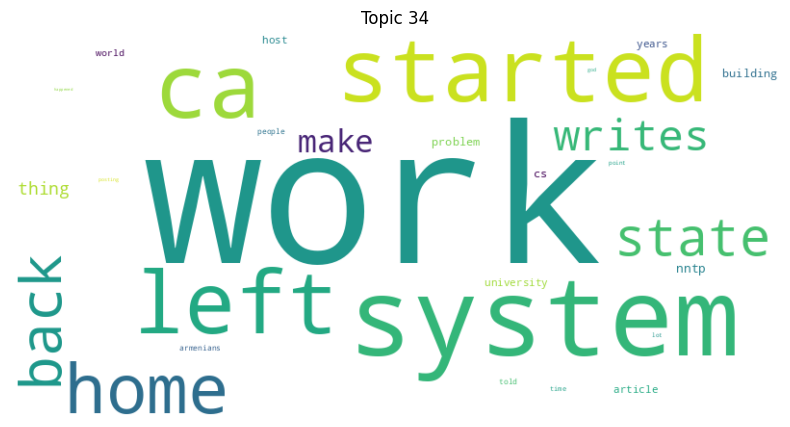

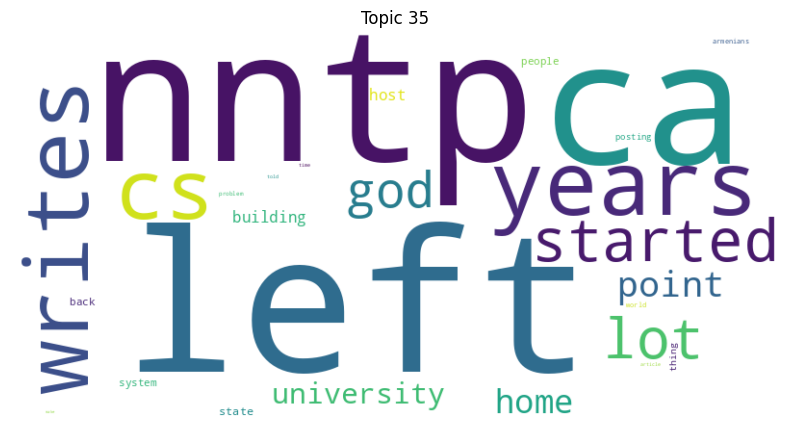

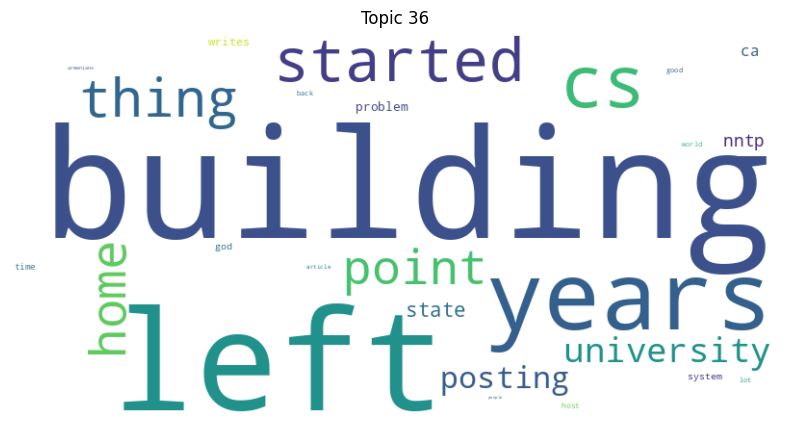

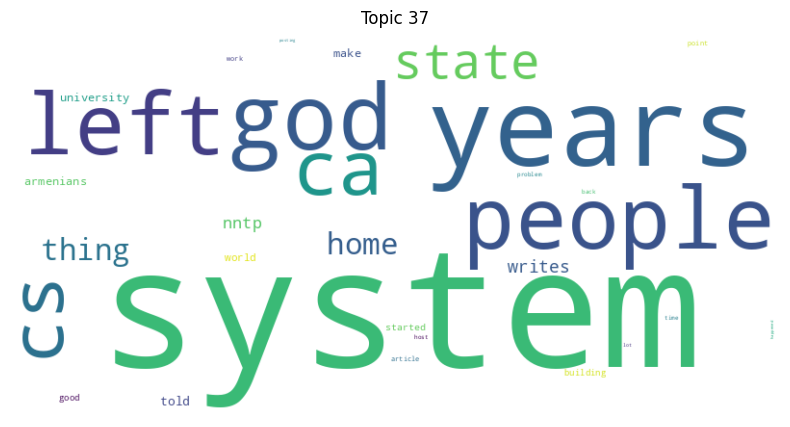

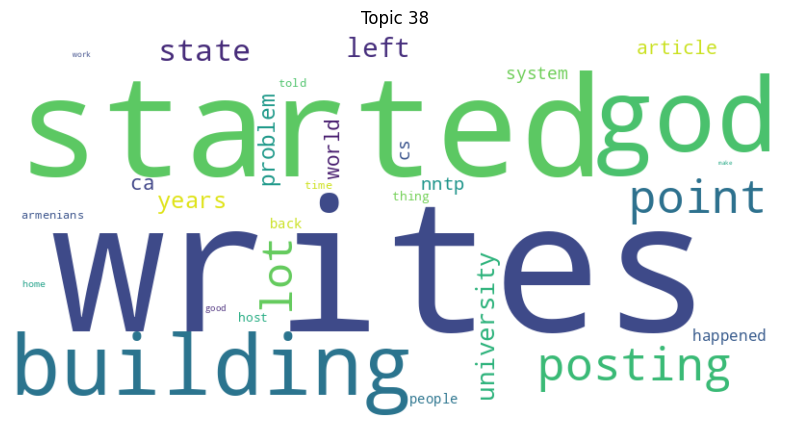

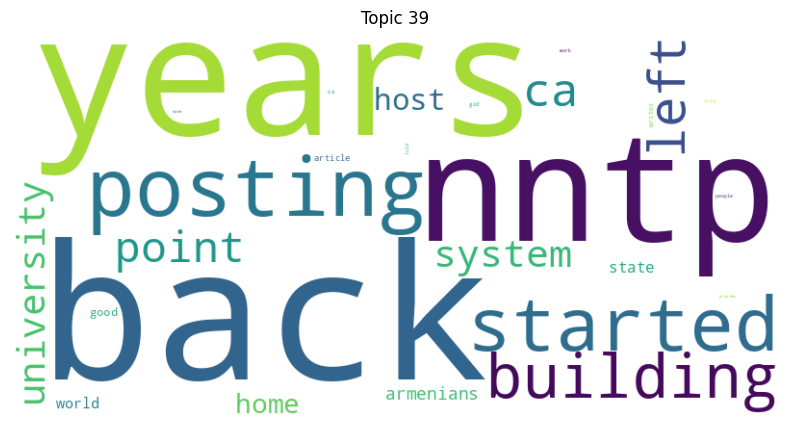

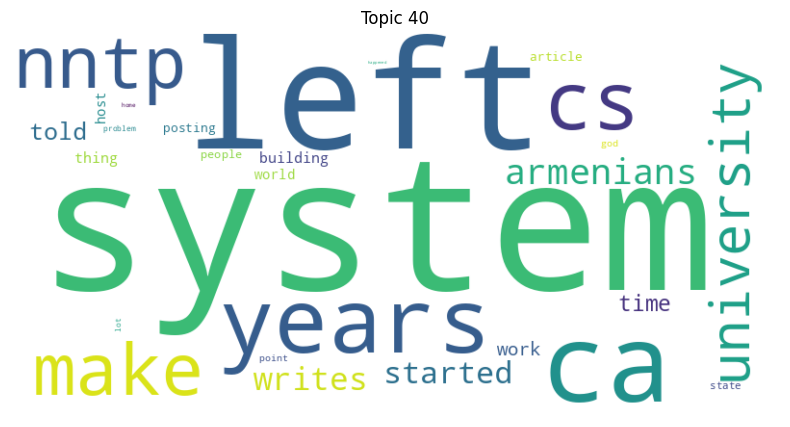

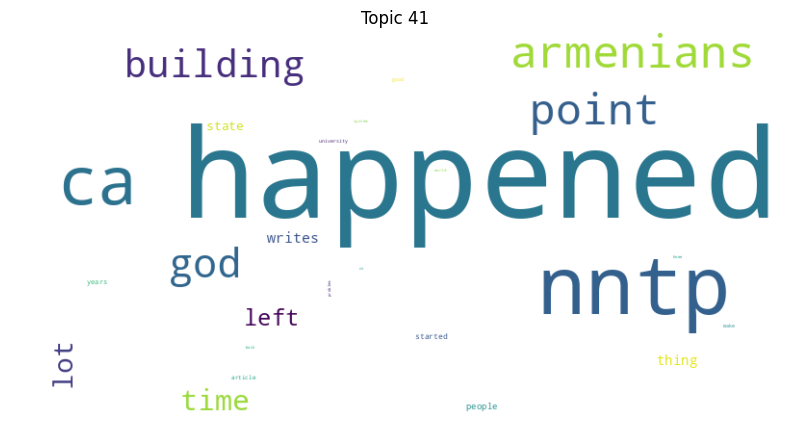

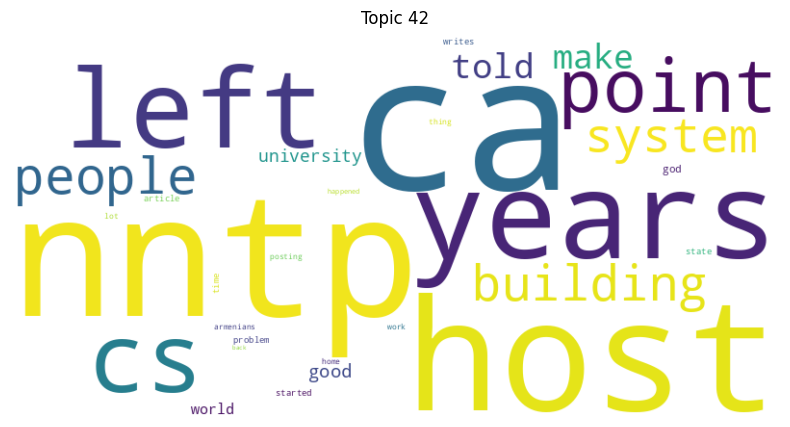

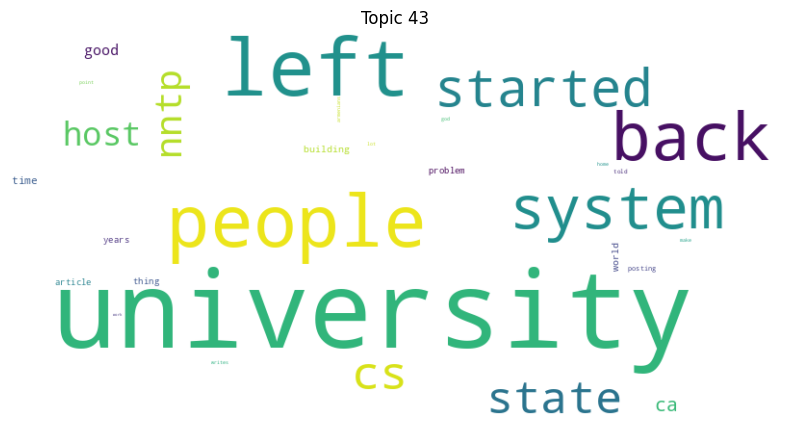

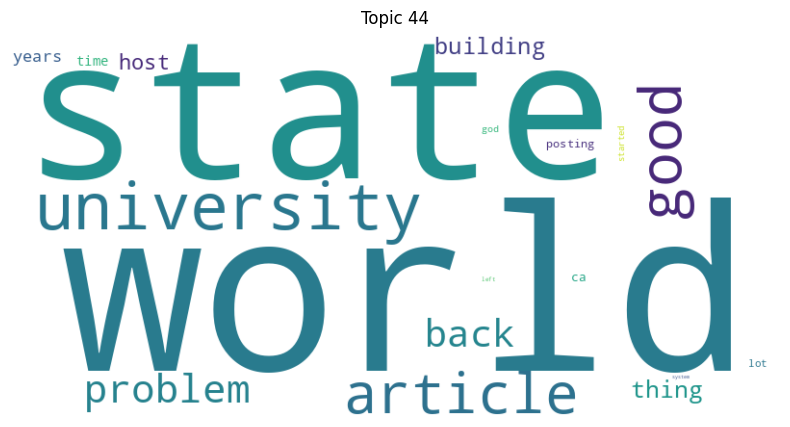

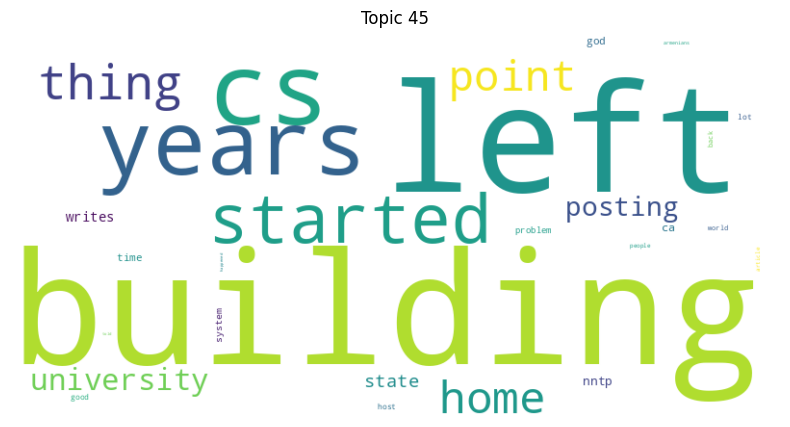

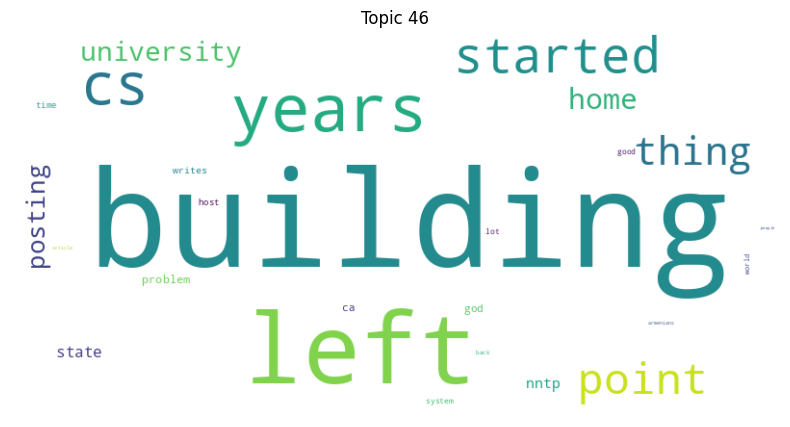

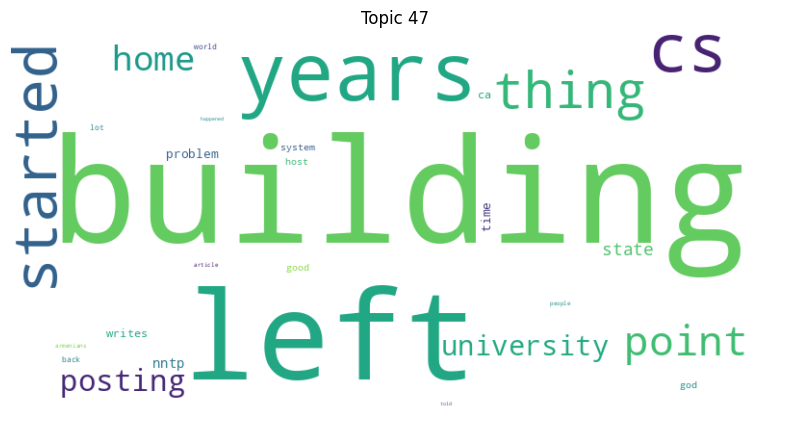

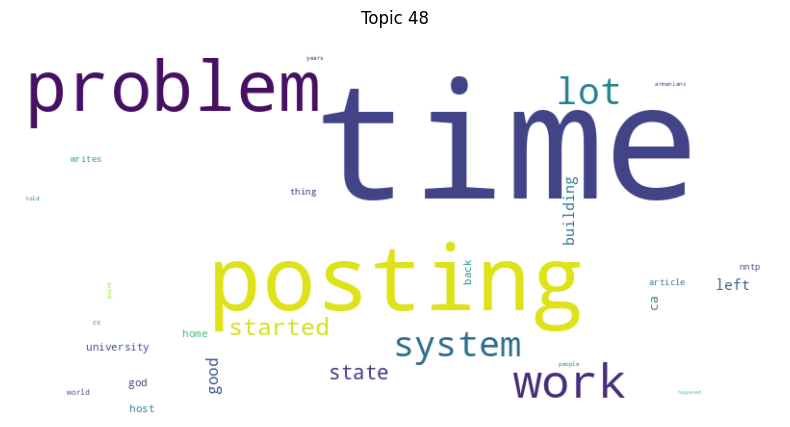

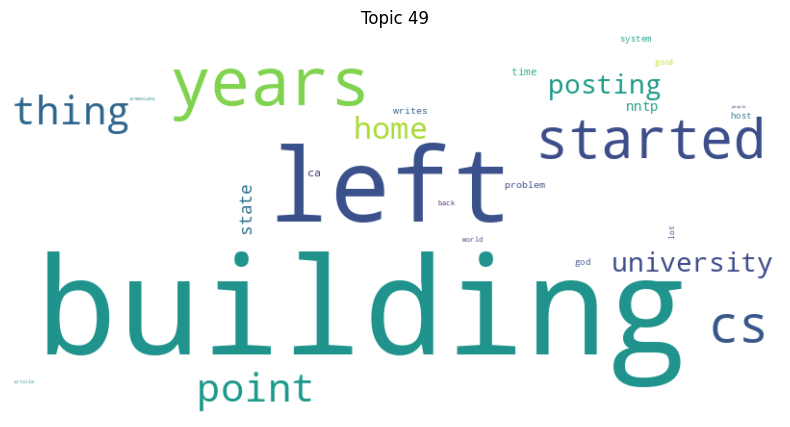

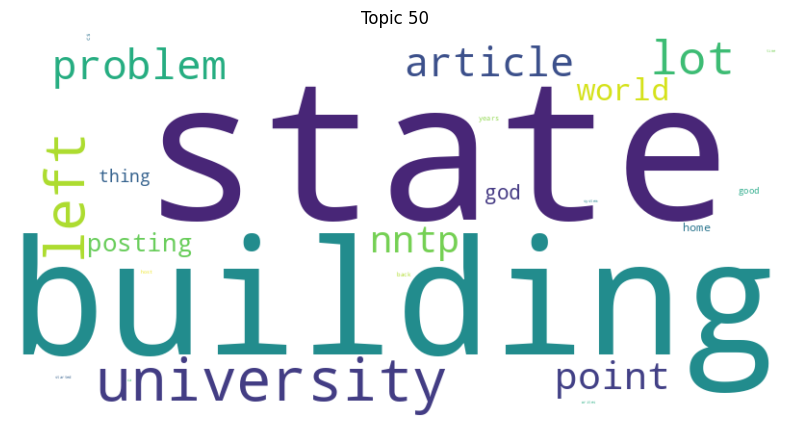

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming t_w_dist_mtx is your topic-word matrix and word_list contains the words
# Move the tensor to the CPU and convert it to a NumPy array
t_w_dist_mtx_cpu = t_w_dist_mtx.cpu().numpy()

# Example word list (replace with your actual list of words)
word_list = ['good', 'time', 'writes', 'make', 'article', 'people', 'thing', 'back', 'lot', 'problem','writes', 'article', 'posting', 'university', 'host', 'nntp', 'cs', 'ca', 'system', 'good','people', 'time', 'good', 'make', 'world', 'god', 'point', 'state', 'years', 'work','people', 'time', 'told', 'home', 'left', 'back', 'started', 'building', 'armenians', 'happened']  # Replace with actual words

# Function to create word clouds for each topic
def create_word_clouds(topic_word_matrix, words):
    num_topics = topic_word_matrix.shape[0]
    for topic_idx in range(num_topics):
        # Get the word distribution for the current topic
        word_distribution = topic_word_matrix[topic_idx]
        # Create a dictionary of words and their frequencies
        word_freq = {words[i]: word_distribution[i] for i in range(len(words))}
        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {topic_idx + 1}')
        plt.show()

# Create word clouds for each topic
create_word_clouds(t_w_dist_mtx_cpu, word_list)


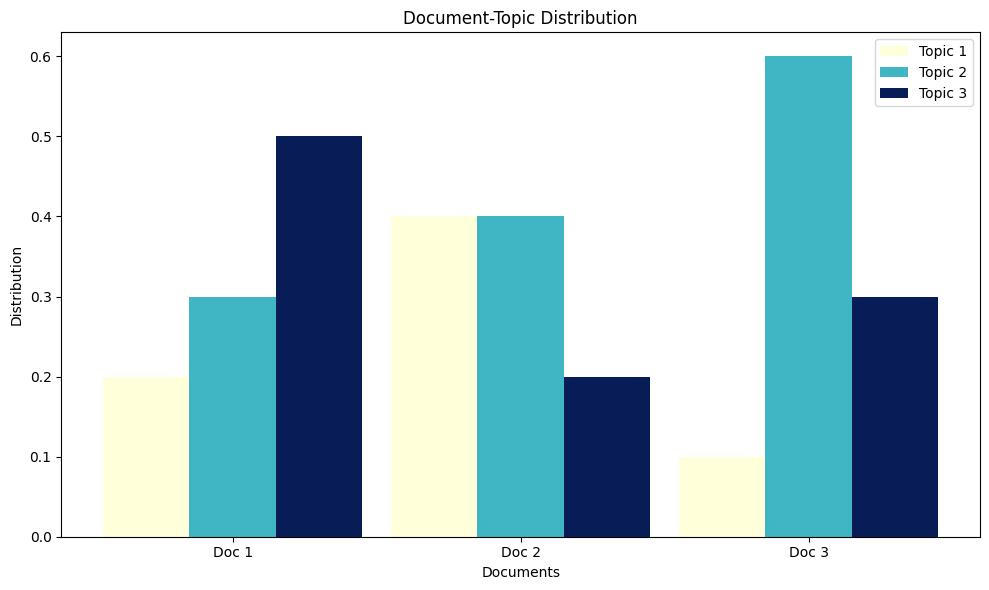

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual document-topic distribution matrix)
# d_t_dist_mtx = np.array([[0.2, 0.3, 0.5],
#                          [0.4, 0.4, 0.2],
#                          [0.1, 0.6, 0.3]])

# Number of topics and documents (adjust based on your data)
num_topics = d_t_dist_mtx.shape[1]
num_documents = d_t_dist_mtx.shape[0]

# Width of each bar
bar_width = 0.15

# Position of each bar on X-axis
index = np.arange(num_documents)

# Color map for bars (adjust colors as needed)
colors = plt.cm.YlGnBu(np.linspace(0, 1, num_topics))

# Plotting the clustered bar chart
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(num_topics):
    ax.bar(index + i * bar_width, d_t_dist_mtx[:, i], bar_width, label=f'Topic {i+1}', color=colors[i])

ax.set_xlabel('Documents')
ax.set_ylabel('Distribution')
ax.set_title('Document-Topic Distribution')

# Adjusting xticks and xticklabels
ax.set_xticks(index + bar_width * (num_topics - 1) / 2)
ax.set_xticklabels(['Doc 1', 'Doc 2', 'Doc 3'])  # Replace with actual document names or IDs

ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
!pip install gensim


In [ ]:
import numpy as np

def get_topics_words(etm_instance, top_n=10):
    """Extract top n words for each topic."""
    topic_word_matrix = etm_instance.get_topic_word_matrix()
    topics_words = []
    for topic_idx in range(topic_word_matrix.shape[0]):
        top_words_idx = np.argsort(topic_word_matrix[topic_idx])[::-1][:top_n]
        top_words = [etm_instance.vocab[idx] for idx in top_words_idx]
        topics_words.append(top_words)
    return topics_words

topics_words = get_topics_words(etm_instance)


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Prepare the data
texts = [list(map(str, tokens[0])) for tokens in train_tokens]
dictionary = Dictionary(texts)

# Compute the coherence score using C_V
coherence_model_cv = CoherenceModel(
    topics=topics_words,
    texts=texts,
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score_cv = coherence_model_cv.get_coherence()
print("Coherence Score (C_V):", coherence_score_cv)


In [ ]:
# Normalize the coherence score and diversity score (assuming max coherence is 1 and max diversity is 1)
normalized_coherence = coherence_score_cv / 1.0  # assuming max coherence score is 1
normalized_diversity = topic_diversity / 1.0     # assuming max diversity score is 1

# Combine the normalized metrics into a composite quality score
# Example: Equal weighting of coherence and diversity
quality_score = (normalized_coherence + normalized_diversity) / 2.0
print("Composite Quality Score:", quality_score)
